# Scikit Learn

#### Supervised learning example: Simple linear regression

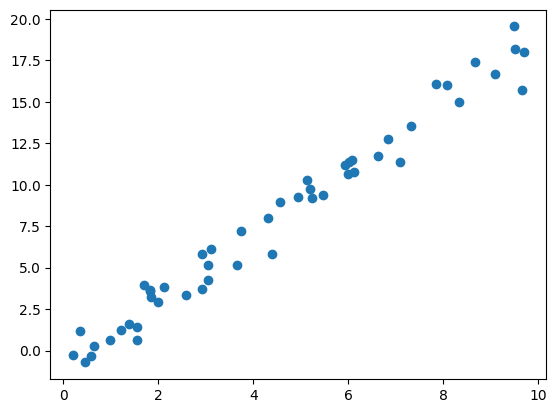

In [1]:
import matplotlib.pyplot as plt
import numpy as np
rng = np.random.RandomState(42)
x = 10 * rng.rand(50)
y = 2 * x - 1 + rng.randn(50)
plt.scatter(x, y);

In [2]:
from sklearn.linear_model import LinearRegression

In [3]:
model = LinearRegression(fit_intercept=True)
model

LinearRegression()

In [4]:
X = x[:, np.newaxis] #x.reshape(-1,1)
X.shape

(50, 1)

In [5]:
model.fit(X, y)

LinearRegression()

In [6]:
xfit = np.linspace(-1, 11)

In [7]:
Xfit = xfit[:, np.newaxis]
yfit = model.predict(Xfit)

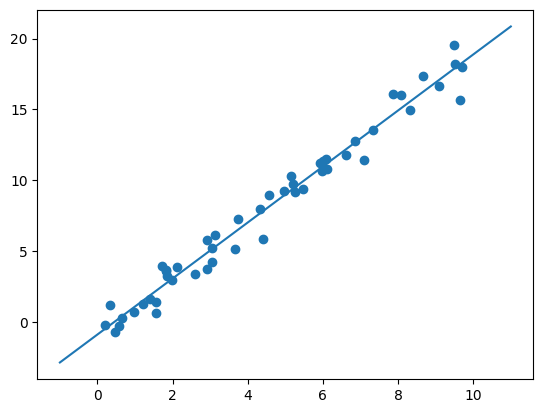

In [8]:
plt.scatter(x, y)
plt.plot(xfit, yfit);

#### Supervised learning example: Iris classification

In [9]:
import seaborn as sns
iris = sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [10]:
X_iris = iris.drop('species', axis=1)
X_iris.shape

(150, 4)

In [11]:
y_iris = iris['species']
y_iris.shape

(150,)

In [12]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(X_iris, y_iris,random_state=1)

In [13]:
from sklearn.naive_bayes import GaussianNB # 1. choose model class
model = GaussianNB()                       # 2. instantiate model
model.fit(Xtrain, ytrain)                  # 3. fit model to data
y_model = model.predict(Xtest)             # 4. predict on new data

In [14]:
from sklearn.metrics import accuracy_score
accuracy_score(ytest, y_model)

0.9736842105263158

#### Unsupervised learning example: Iris dimensionality

In [15]:
from sklearn.decomposition import PCA # 1. Choose the model class
model = PCA(n_components=2)           # 2. Instantiate the model with hyperparameters
model.fit(X_iris)                     # 3. Fit to data. Notice y is not specified!
X_2D = model.transform(X_iris)        # 4. Transform the data to two dimensions

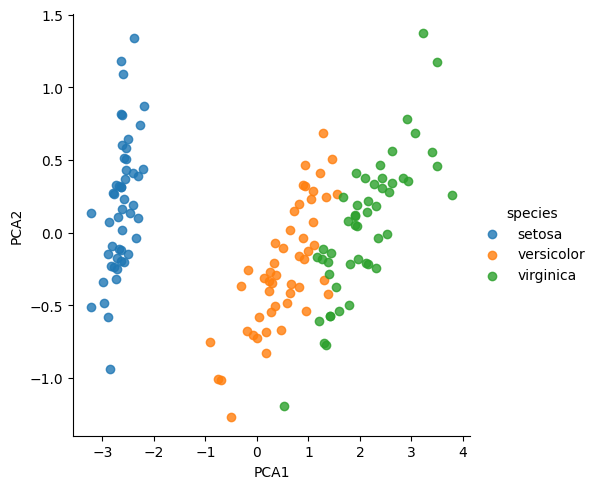

In [16]:
iris['PCA1'] = X_2D[:, 0]
iris['PCA2'] = X_2D[:, 1]
sns.lmplot(data=iris, x = 'PCA1', y = 'PCA2', hue = 'species',fit_reg=False);

#### Unsupervised learning: Iris clustering

In [17]:
from sklearn.mixture import GaussianMixture as GMM  # 1. Choose the model class
model = GMM(n_components=3, covariance_type='full') # 2. Instantiate the model with hyperparameters
model.fit(X_iris)                                   # 3. Fit to data. Notice y is not specified!
y_gmm = model.predict(X_iris)                       # 4. Determine cluster labels

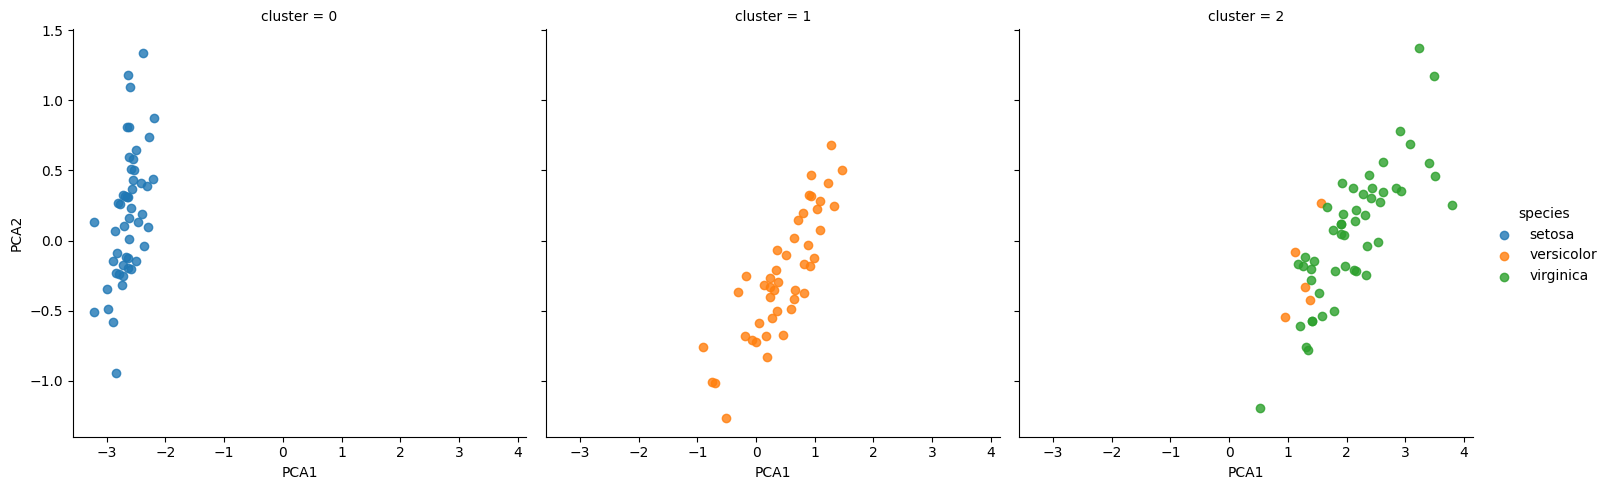

In [18]:
iris['cluster'] = y_gmm
sns.lmplot(x = "PCA1", y= "PCA2", data=iris, hue='species',col='cluster', fit_reg=False);

### Application: Exploring Handwritten Digits

#### Loading and visualizing the digits data

In [19]:
from sklearn.datasets import load_digits
digits = load_digits()
digits.images.shape

(1797, 8, 8)

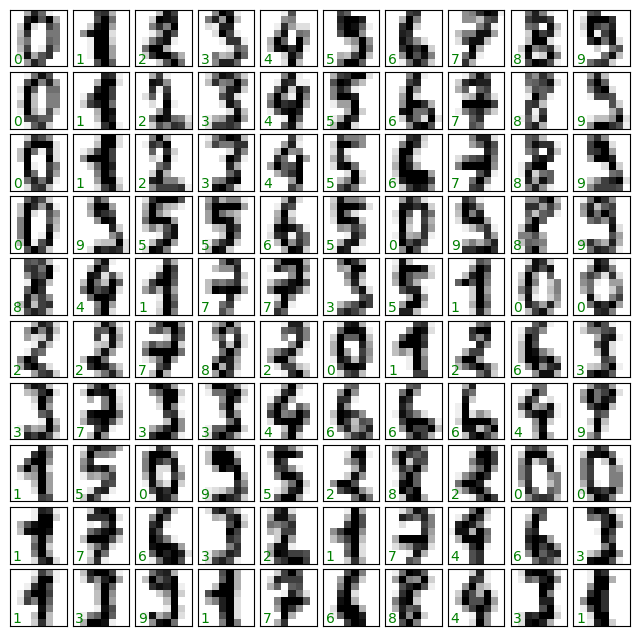

In [20]:
import matplotlib.pyplot as plt
fig, axes = plt.subplots(10, 10, figsize=(8, 8),subplot_kw={'xticks':[], 'yticks':[]},
gridspec_kw=dict(hspace=0.1, wspace=0.1))
for i, ax in enumerate(axes.flat):
    ax.imshow(digits.images[i], cmap='binary', interpolation='nearest')
    ax.text(0.05, 0.05, str(digits.target[i]),
    transform=ax.transAxes, color='green')

In [21]:
X = digits.data
X.shape

(1797, 64)

In [22]:
y = digits.target
y.shape

(1797,)

In [23]:
from sklearn.manifold import Isomap
iso = Isomap(n_components=2)
iso.fit(digits.data)
data_projected = iso.transform(digits.data)
data_projected.shape

d:\Notebook\myenv\lib\site-packages\sklearn\manifold\_isomap.py:359: UserWarning: The number of connected components of the neighbors graph is 2 > 1. Completing the graph to fit Isomap might be slow. Increase the number of neighbors to avoid this issue.
  self._fit_transform(X)
d:\Notebook\myenv\lib\site-packages\scipy\sparse\_index.py:108: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil and dok are more efficient.
  self._set_intXint(row, col, x.flat[0])


(1797, 2)

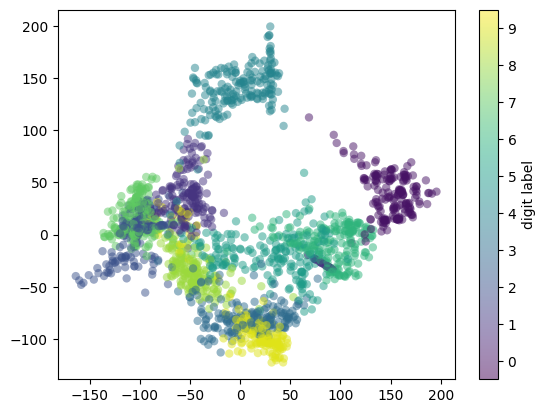

In [24]:
cmap=plt.colormaps['viridis']
plt.scatter(data_projected[:, 0], data_projected[:, 1], c=digits.target,
            edgecolor='none', alpha=0.5, cmap=cmap)
plt.colorbar(label='digit label', ticks=range(10))
plt.clim(-0.5, 9.5);

#### Classification on digits

In [25]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, random_state=0)

In [26]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(Xtrain, ytrain)
y_model = model.predict(Xtest)

In [27]:
from sklearn.metrics import accuracy_score
accuracy_score(ytest, y_model)

0.8333333333333334

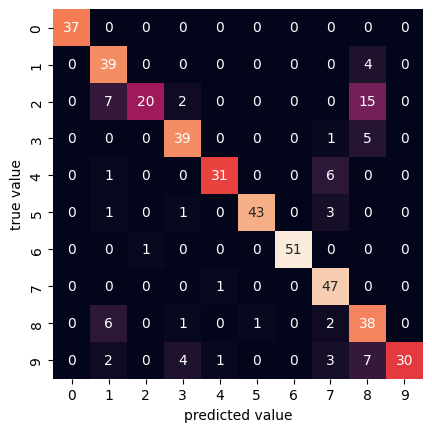

In [28]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(ytest, y_model)
sns.heatmap(mat, square=True, annot=True, cbar=False)
plt.xlabel('predicted value')
plt.ylabel('true value');

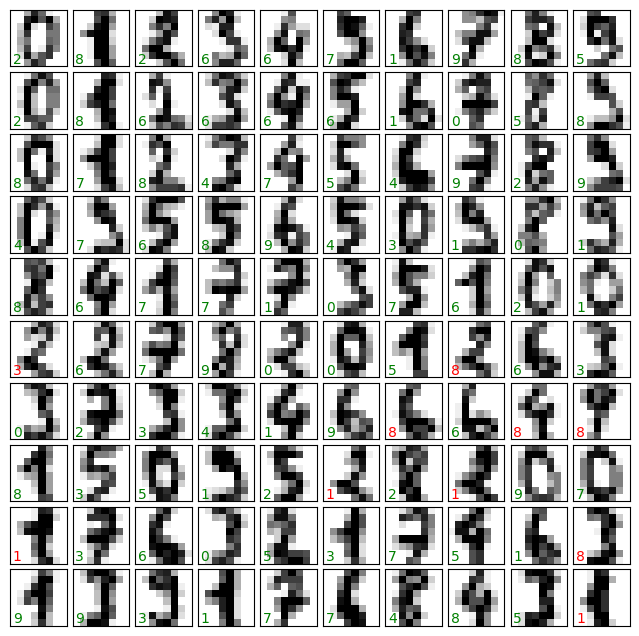

In [29]:
fig, axes = plt.subplots(10, 10, figsize=(8, 8),
                         subplot_kw={'xticks':[], 'yticks':[]},
                         gridspec_kw=dict(hspace=0.1, wspace=0.1))
for i, ax in enumerate(axes.flat):
    ax.imshow(digits.images[i], cmap='binary', interpolation='nearest')
    ax.text(0.05, 0.05, str(y_model[i]),
    transform=ax.transAxes,
    color='green' if (ytest[i] == y_model[i]) else 'red')

### Hyperparameters and Model Validation

#### Thinking About Model Validation
##### Model validation the wrong way

In [30]:
from sklearn.datasets import load_iris
iris = load_iris()
X = iris.data
y = iris.target

In [31]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=1)

In [32]:
model.fit(X, y)
y_model = model.predict(X)

In [33]:
from sklearn.metrics import accuracy_score
accuracy_score(y, y_model)

1.0

##### Model validation the right way: Holdout sets

In [34]:
from sklearn.model_selection import train_test_split
# split the data with 50% in each set
X1, X2, y1, y2 = train_test_split(X, y, random_state=0,
                                  train_size=0.5)
# fit the model on one set of data
model.fit(X1, y1)
# evaluate the model on the second set of data
y2_model = model.predict(X2)
accuracy_score(y2, y2_model)

0.9066666666666666

##### Model validation via cross-validation

In [35]:
y2_model = model.fit(X1, y1).predict(X2)
y1_model = model.fit(X2, y2).predict(X1)
accuracy_score(y1, y1_model), accuracy_score(y2, y2_model)

(0.96, 0.9066666666666666)

In [36]:
from sklearn.model_selection import cross_val_score
cross_val_score(model, X, y, cv=5)

array([0.96666667, 0.96666667, 0.93333333, 0.93333333, 1.        ])

In [37]:
from sklearn.model_selection import LeaveOneOut
scores = cross_val_score(model, X, y, cv=LeaveOneOut())
scores

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 0., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [38]:
len(X)

150

In [39]:
len(scores)

150

In [40]:
scores.mean()

np.float64(0.96)

### Feature Engineering
#### Categorical Features

In [41]:
 data = [ {'price': 850000, 'rooms': 4, 'neighborhood': 'Queen Anne'},
         {'price': 700000, 'rooms': 3, 'neighborhood': 'Fremont'},
         {'price': 650000, 'rooms': 3, 'neighborhood': 'Wallingford'},
         {'price': 600000, 'rooms': 2, 'neighborhood': 'Fremont'}
        ]

In [42]:
{'Queen Anne': 1, 'Fremont': 2, 'Wallingford': 3};

In [43]:
from sklearn.feature_extraction import DictVectorizer
vec = DictVectorizer(sparse=False, dtype=int)
vec.fit_transform(data)

array([[     0,      1,      0, 850000,      4],
       [     1,      0,      0, 700000,      3],
       [     0,      0,      1, 650000,      3],
       [     1,      0,      0, 600000,      2]])

In [44]:
vec.get_feature_names_out()

array(['neighborhood=Fremont', 'neighborhood=Queen Anne',
       'neighborhood=Wallingford', 'price', 'rooms'], dtype=object)

In [45]:
# other example
measurements = [
    {'city': 'Dubai', 'temperature': 33.},
    {'city': 'London', 'temperature': 12.},
    {'city': 'San Francisco', 'temperature': 18.},
]


In [46]:
vec.fit_transform(measurements)

array([[ 1,  0,  0, 33],
       [ 0,  1,  0, 12],
       [ 0,  0,  1, 18]])

In [47]:
vec.get_feature_names_out()

array(['city=Dubai', 'city=London', 'city=San Francisco', 'temperature'],
      dtype=object)

#### Text Features

In [48]:
sample = ['problem of evil','evil queen','horizon problem']

In [49]:
from sklearn.feature_extraction.text import CountVectorizer
vec = CountVectorizer()
X = vec.fit_transform(sample)
X 

<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 7 stored elements and shape (3, 5)>

In [50]:
import pandas as pd
pd.DataFrame(X.toarray(), columns=vec.get_feature_names_out())

,evil,horizon,of,problem,queen
0,1,0,1,1,0
1,1,0,0,0,1
2,0,1,0,1,0


#### Image features

In [51]:
import numpy as np
from sklearn.feature_extraction import image

one_image = np.arange(4 * 4 * 3).reshape((4, 4, 3))
one_image[:, :, 0]  # R channel of a fake RGB picture
patches = image.extract_patches_2d(one_image, (2, 2), max_patches=2,
    random_state=0)

In [52]:
patches.shape
patches[:, :, :, 0]

patches = image.extract_patches_2d(one_image, (2, 2))
patches.shape
patches[4, :, :, 0]

array([[15, 18],
       [27, 30]])

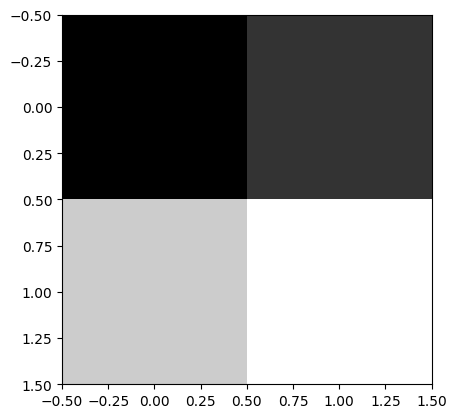

In [53]:
import matplotlib.pyplot as plt
plt.imshow(patches[4, :, :, 0], cmap='gray', interpolation='nearest');

#### Derived Features

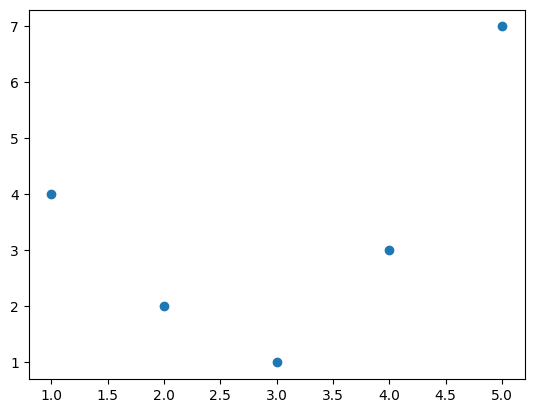

In [54]:
import numpy as np
import matplotlib.pyplot as plt
x = np.array([1, 2, 3, 4, 5])
y = np.array([4, 2, 1, 3, 7])
plt.scatter(x, y);

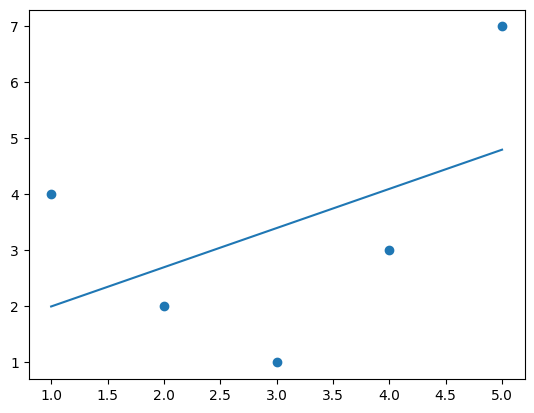

In [55]:
from sklearn.linear_model import LinearRegression
X = x[:, np.newaxis]
model = LinearRegression().fit(X, y)
yfit = model.predict(X)
plt.scatter(x, y)
plt.plot(x, yfit);

In [56]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=3, include_bias=False)
X2 = poly.fit_transform(X)
print(X2)

[[  1.   1.   1.]
 [  2.   4.   8.]
 [  3.   9.  27.]
 [  4.  16.  64.]
 [  5.  25. 125.]]


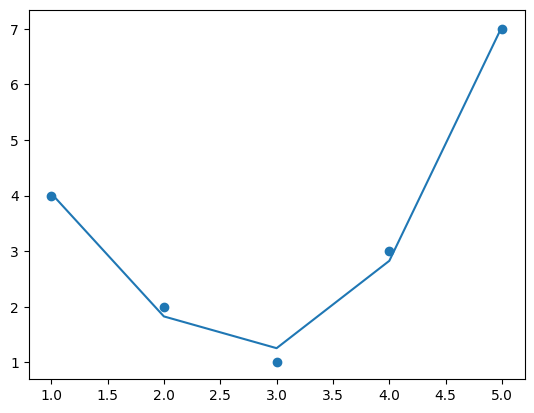

In [57]:
model = LinearRegression().fit(X2, y)
yfit = model.predict(X2)
plt.scatter(x, y)
plt.plot(x, yfit);

#### Imputation of Missing Data

In [58]:
from numpy import nan
X = np.array([[ nan, 0, 3 ],
              [ 3, 7, 9 ],
              [ 3, 5, 2 ],
              [ 4, nan, 6 ],
              [ 8, 8, 1 ]])
y = np.array([14, 16, -1, 8, -5])

In [59]:
from sklearn.impute import SimpleImputer as Imputer
imp = Imputer(strategy='mean')
X2 = imp.fit_transform(X)
X2

array([[4.5, 0. , 3. ],
       [3. , 7. , 9. ],
       [3. , 5. , 2. ],
       [4. , 5. , 6. ],
       [8. , 8. , 1. ]])

In [60]:
model = LinearRegression().fit(X2, y)
model.predict(X2)

array([13.14869292, 14.3784627 , -1.15539732, 10.96606197, -5.33782027])

#### Feature Pipelines

In [61]:
from sklearn.pipeline import make_pipeline
model = make_pipeline(Imputer(strategy='mean'),
                      PolynomialFeatures(degree=2),
                      LinearRegression())

In [62]:
model.fit(X, y) # X with missing values, from above
print(y)
print(model.predict(X))

[14 16 -1  8 -5]
[14. 16. -1.  8. -5.]


### Practices

#### Final project:  Dự đoán giá cổ phiếu sử dụng Machine Learning

#### Mô tả:
Bạn là một nhà đầu tư muốn sử dụng machine learning để dự đoán giá cổ phiếu trong tương lai của một công ty. Bạn có một tập dữ liệu lịch sử về giá cổ phiếu và các chỉ số tài chính liên quan của công ty đó.
#### Yêu cầu:

1. Tiền xử lý dữ liệu: Xóa các cột không cần thiết, xử lý các giá trị thiếu, chuyển đổi các biến phân loại thành dạng số (nếu có).
2. Phân chia dữ liệu: Chia tập dữ liệu thành tập huấn luyện và tập kiểm tra.
3. Xây dựng mô hình: Sử dụng các thuật toán machine learning như Linear Regression, Random Forest, hoặc Gradient Boosting để xây dựng mô hình dự đoán giá cổ phiếu.
4. Đánh giá mô hình: Đánh giá hiệu suất của mô hình trên tập kiểm tra bằng các phép đo như RMSE, MAE, v.v.
5. Tinh chỉnh mô hình (nếu cần): Tinh chỉnh các tham số của mô hình để cải thiện hiệu suất.
6. Dự đoán giá cổ phiếu: Dự đoán giá cổ phiếu trong tương lai bằng cách sử dụng mô hình đã xây dựng.